# Lab 05 : Train with mini-batches -- demo

In [1]:
import sys, os

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from random import randint
import utils
import time

# Warm up

### Make a random matrix with 5 rows

In [19]:
%%time
A = torch.rand(5,3)
print(A)

tensor([[0.3984, 0.6832, 0.6333],
        [0.1301, 0.2363, 0.0911],
        [0.8206, 0.2789, 0.2191],
        [0.7916, 0.1071, 0.2405],
        [0.3349, 0.8649, 0.8958]])
CPU times: user 2.6 ms, sys: 0 ns, total: 2.6 ms
Wall time: 1.75 ms


### Choose at random two indices in {0,1,2,3,4}

In [27]:
indices = torch.LongTensor(2).random_(0,5) # generate an integer randomly from 0 to 5-1.
print(indices)

tensor([2, 4])


### Extract the corresponding rows of the matrix

In [32]:
minibatch = A[indices]
print(minibatch)

tensor([[0.8206, 0.2789, 0.2191],
        [0.3349, 0.8649, 0.8958]])


# Demo

### Download the data and print the size

In [33]:
from utils import check_mnist_dataset_exists
data_path = check_mnist_dataset_exists()

In [35]:
train_data = torch.load(data_path+'mnist/train_data.pt')
print(train_data.size())

torch.Size([60000, 28, 28])


In [38]:
train_label = torch.load(data_path+'mnist/train_label.pt')
print(train_label.size())

torch.Size([60000])


In [40]:
test_data = torch.load(data_path+'mnist/test_data.pt')
print(test_data.size())

torch.Size([10000, 28, 28])


### Make a one layer net class

In [41]:
class one_layer_net(nn.Module):
    
    def __init__(self, input_size, output_size):
        super(one_layer_net, self).__init__()
        self.linear_layer = nn.Linear(input_size, output_size, bias = False)
        
    def forward(self, x):
        y = self.linear_layer(x)
        p = F.softmax(y, dim=1)
        return p

### Build the net

In [43]:
net = one_layer_net(784,10)
print(net)

one_layer_net(
  (linear_layer): Linear(in_features=784, out_features=10, bias=False)
)


### Choose the size of the mini-batches

In [44]:
bs = 200

### Take the 6th image of the test set:

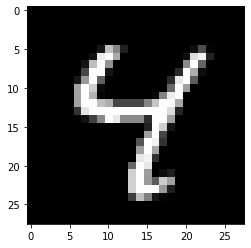

In [45]:
im = test_data[6]
utils.show(im)

### Feed it to the UNTRAINED network and print the confidence scores

In [46]:
prob = net(im.view(1,784))
print(prob)

tensor([[0.0912, 0.0920, 0.1218, 0.1197, 0.0969, 0.0970, 0.1038, 0.1020, 0.0682,
         0.1074]], grad_fn=<SoftmaxBackward>)


### Display visually the confidence scores

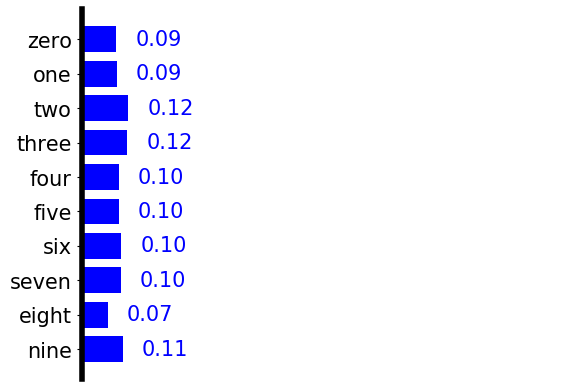

In [48]:
utils.show_prob_mnist(prob)

### Train the network (only 5000 iterations) on the train set

In [50]:
criterion = nn.NLLLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)

for iter in range(1, 5000):
    
    # create a minibatch
    indices = torch.LongTensor(bs).random_(0, 60000)
    minibatch_data = train_data[indices]
    minibatch_label = train_label[indices]
    
    # reshape them to fit the network
    inputs = minibatch_data.view(bs, 784)
    
    # feed the input to the net
    inputs.requires_grad_()
    prob = net(inputs)
    
    # update the weights (all the magic happens here -- we will discus it later)
    log_prob = torch.log(prob)
    loss = criterion(log_prob, minibatch_label)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

### Take the 6th image of the test set:

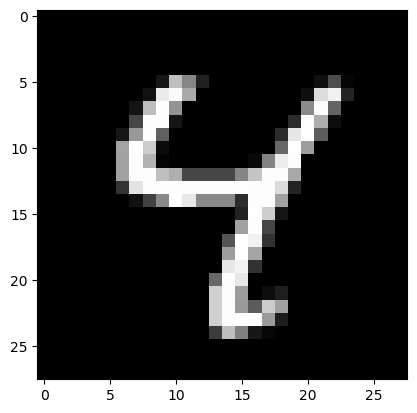

In [51]:
im = test_data[6]
utils.show(im)

### Feed it to the TRAINED net:

In [53]:
prob = net(im.view(1,784))
print(prob)

tensor([[2.5764e-04, 2.2829e-04, 2.6040e-04, 1.0001e-02, 8.0804e-01, 4.1346e-02,
         1.4550e-03, 1.9573e-02, 6.1018e-02, 5.7817e-02]],
       grad_fn=<SoftmaxBackward>)


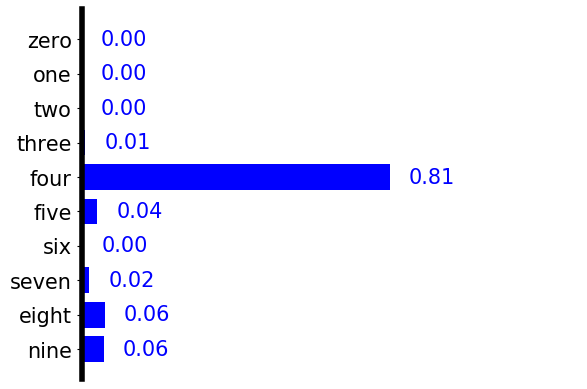

In [55]:
utils.show_prob_mnist(prob)

### Choose image at random from the test set and see how good/bad are the predictions

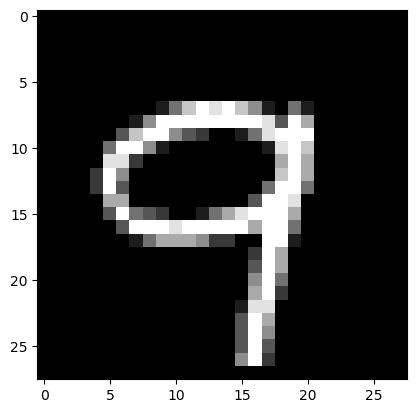

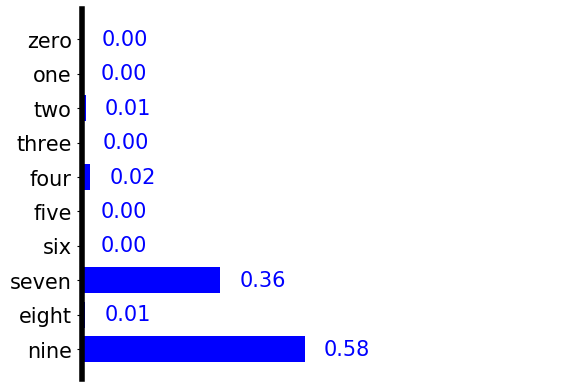

In [56]:
# choose a picture at random
idx = randint(0, 10000-1)
im = test_data[idx]

# display the picture
utils.show(im)

# feed it to the net and display the confidence scores
prob = net(im.view(1,784))
utils.show_prob_mnist(prob)